#### Task 4(c): Take a grayscale image of size 512x512, perform edge detection of given the noise & clean image using Ideal & Gaussian High Pass Filters

### Importing the Libraries

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Ideal High Pass Filter

In [46]:
def apply_ideal_high_pass_filter(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D > cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

### Gaussian High Pass Filter
If $D_0$ is the *cutoff frequency*, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = 1-e^{-D^2(u,v)/2{D_0}^2}$$

Where,  
$$D(u,v) = \sqrt{[(u-P/2)^2 + (v-Q/2)^2]}$$

In [47]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = 1 - np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

### Butterworth High-pass Filter
If $D_0$ is the *cutoff frequency*, $n$ is the order, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = \frac{1}{1+[D_0/D(u,v)]^{2n}}$$

Where,  
$$D(u,v) = [(u-P/2)^2 + (v-Q/2)^2]^{\frac{1}{2}}$$

In [48]:
def apply_butterworth_filter(image, order, cutoff_frequency):
    height, width = image.shape
    butterworth_filter = np.zeros((height, width), dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            butterworth_filter[u, v] = 1 / (1 + (cutoff_frequency / D) ** (2 * order))

    filtered_image = image * butterworth_filter
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_image))
    return np.abs(filtered_image)

### Loading the Image

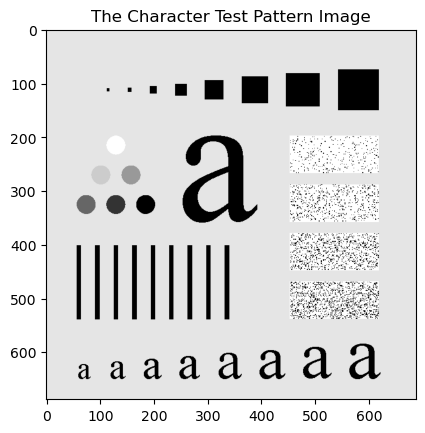

In [49]:
character_pattern_image = cv2.imread("./Characters Test Pattern 688x688.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

### Adding Gaussian Noise

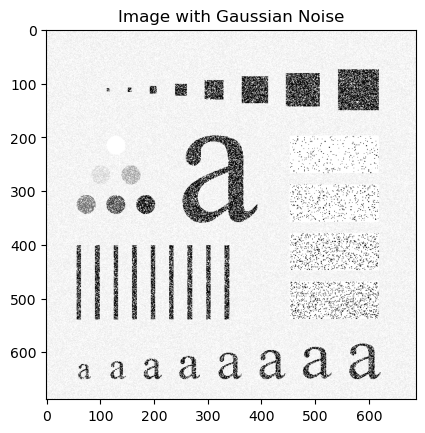

In [50]:
gaussian_noise = np.random.normal(7, 13, character_pattern_image.shape).astype(np.uint8)
noisy_character_image = cv2.add(character_pattern_image, gaussian_noise)
plt.imshow(cv2.cvtColor(noisy_character_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Gaussian Noise")
plt.show()

### Applying FFT (Fast Fourier Transform)

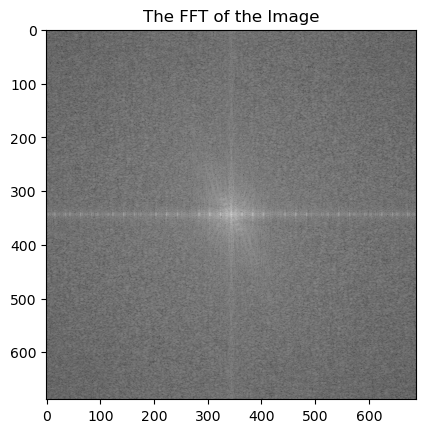

In [51]:
character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(character_pattern_image))
plt.imshow(np.log(np.abs(character_pattern_image_fft)), cmap = "gray")
plt.title("The FFT of the Image")
plt.show()

### Applying FFT To Noisy Image(Fast Fourier Transform)

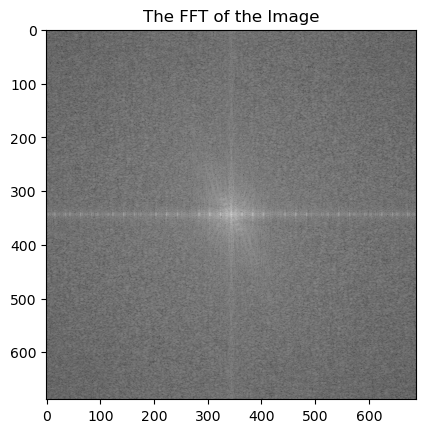

In [52]:
noisy_character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(noisy_character_image))
plt.imshow(np.log(np.abs(character_pattern_image_fft)), cmap="gray")
plt.title("The FFT of the Image")
plt.show()

### Applying Ideal High Pass Filter for Edge Detection

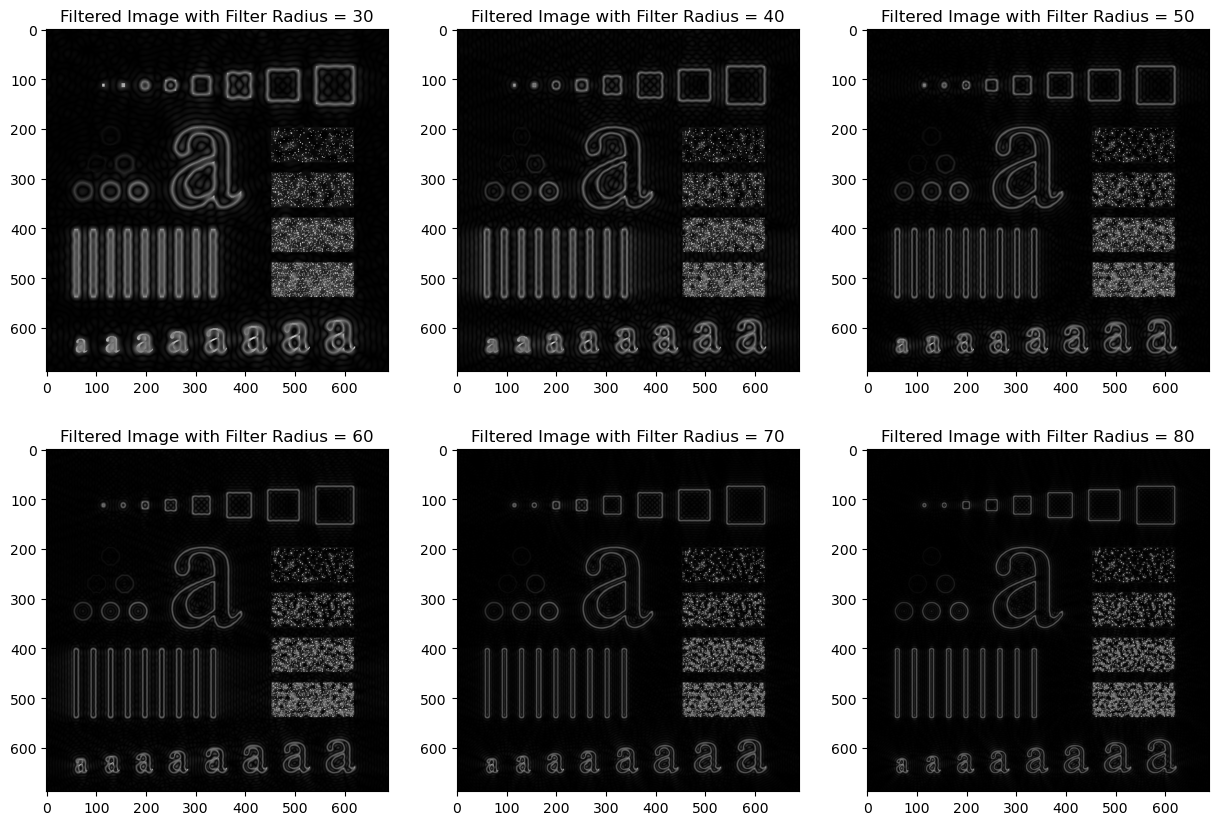

In [53]:
radius = 30
plt.figure(figsize = (15, 10))

for k in range(1, 7):
    ideal_filtered_image = apply_ideal_high_pass_filter(character_pattern_image_fft, radius)
    plt.subplot(2, 3, k)
    plt.imshow(ideal_filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()

### Applying Ideal High Pass Filter To Noisy Image for Edge Detection

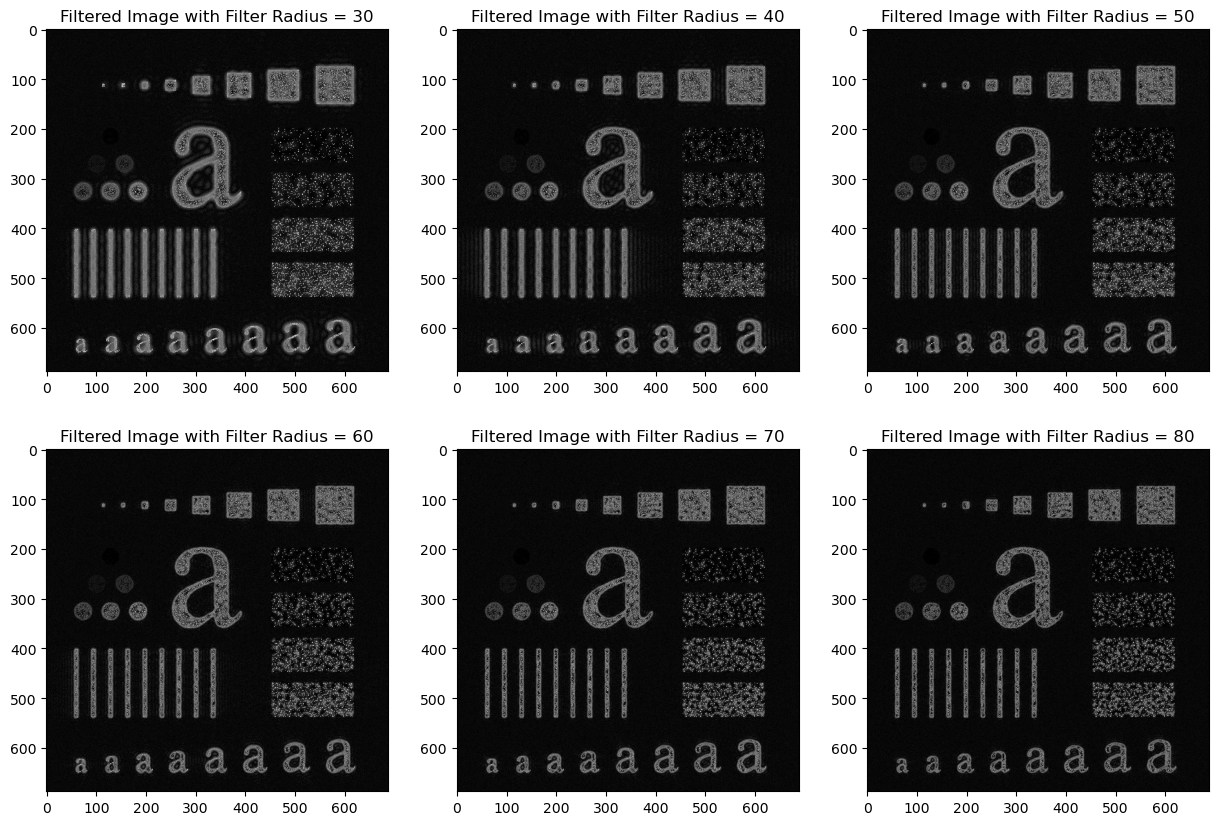

In [54]:
radius = 30
plt.figure(figsize=(15, 10))

for k in range(1, 7):
    ideal_filtered_image = apply_ideal_high_pass_filter(
        noisy_character_pattern_image_fft, radius
    )
    plt.subplot(2, 3, k)
    plt.imshow(ideal_filtered_image, cmap="gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()

### Applying Gaussian High Pass Filter for Edge Detection

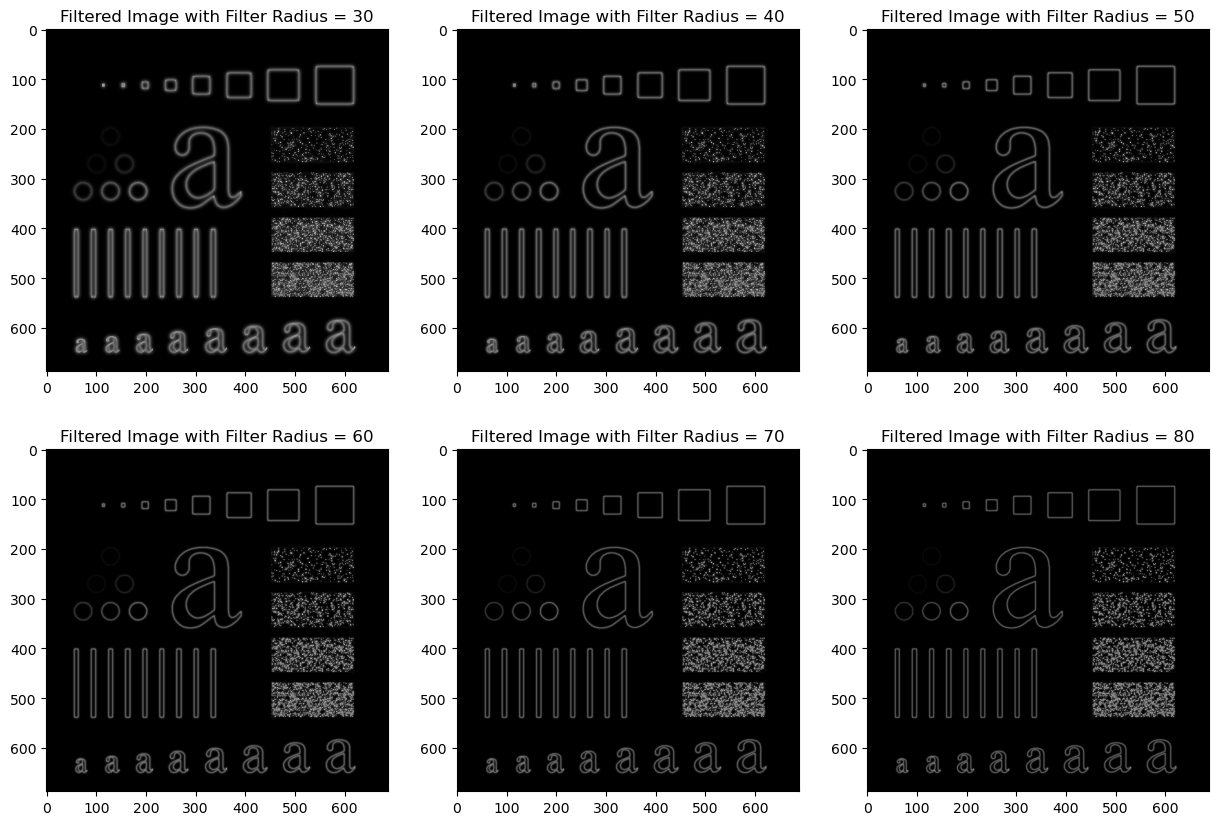

In [55]:
radius = 30
plt.figure(figsize = (15, 10))

for k in range(1, 7):
    gaussian_filtered_image = apply_gaussian_filter(character_pattern_image_fft, radius)
    plt.subplot(2, 3, k)
    plt.imshow(gaussian_filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()

### Applying Gaussian High Pass Filter To Noisy Image for Edge Detection

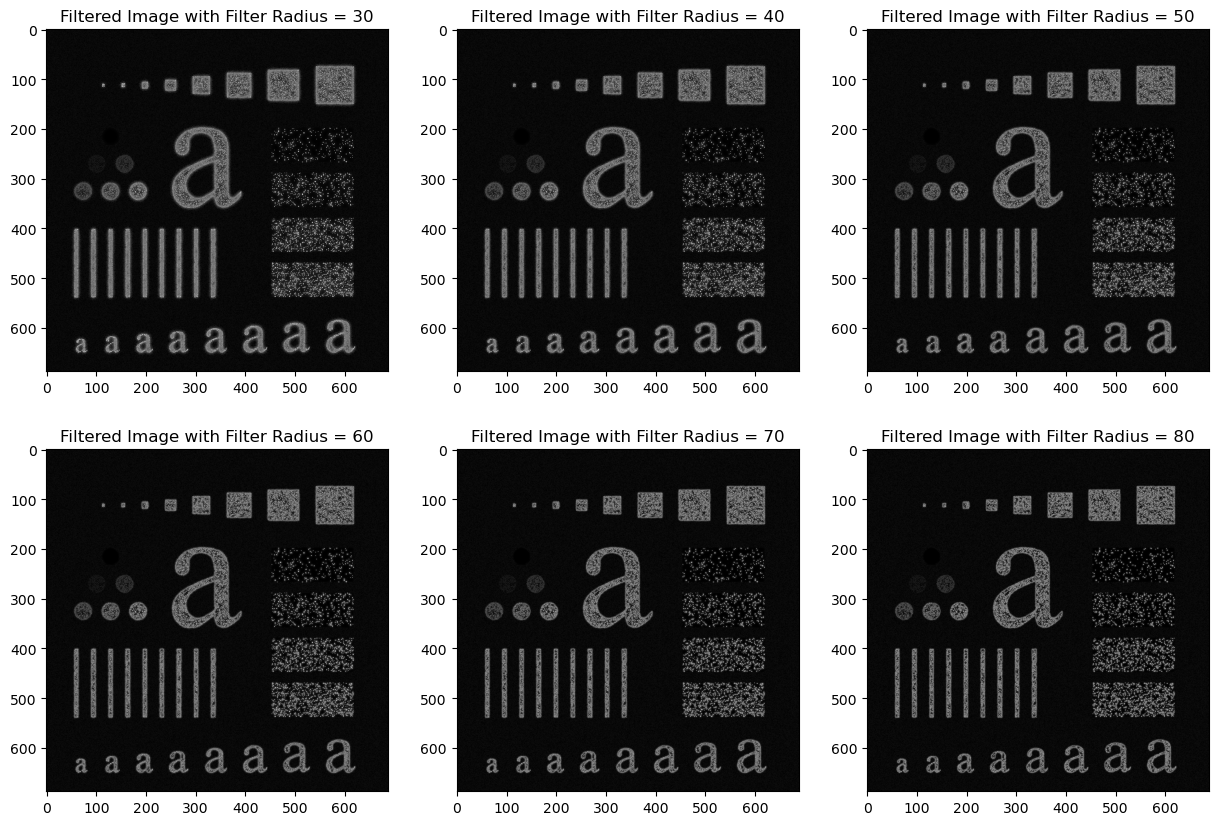

In [56]:
radius = 30
plt.figure(figsize=(15, 10))

for k in range(1, 7):
    gaussian_filtered_image = apply_gaussian_filter(
        noisy_character_pattern_image_fft, radius
    )
    plt.subplot(2, 3, k)
    plt.imshow(gaussian_filtered_image, cmap="gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()